In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [195]:
!pip install imbalanced-learn

In [ ]:
conda install -c conda-forge imbalanced-learn

# Medical Cost Personal Insurance Project


# Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?



In [235]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df


age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

# Exploratory Data Analysis


In [198]:
#checking the dimension of the dataset

df.shape

(1338, 7)

In [199]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [200]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [201]:
#checking the types of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [202]:
df.tail

<bound method NDFrame.tail of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [203]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [204]:
df.isnull().sum().sum()

0

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see there are no null values present in this dataset.

<AxesSubplot:>

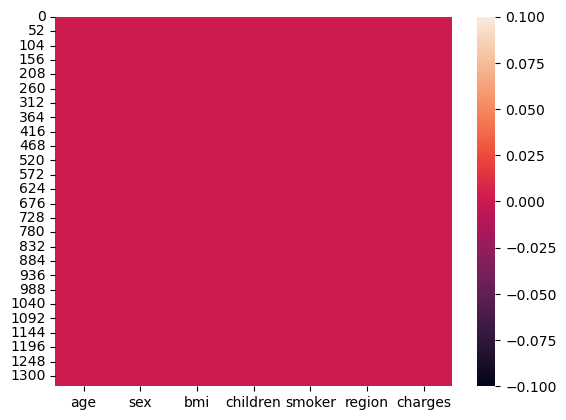

In [207]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

This gives the brief about the dataset which includes indexing type, indexing type, column type, no null values and memory usage. 

In [208]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [209]:
df['charges'].nunique()

1337

In [210]:
#checking the value counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [211]:
df.iloc[1337,:]

age                 61
sex             female
bmi              29.07
children             0
smoker             yes
region       northwest
charges     29141.3603
Name: 1337, dtype: object

In [212]:
#Checking the mean of charges column

print("The mean value of charges is:", df['charges'].mean())


The mean value of charges is: 13270.422265141257


In [213]:
#Filling null values in charge with its mean

df["charges"]=df['charges'].fillna(df['charges'].mean())

<AxesSubplot:>

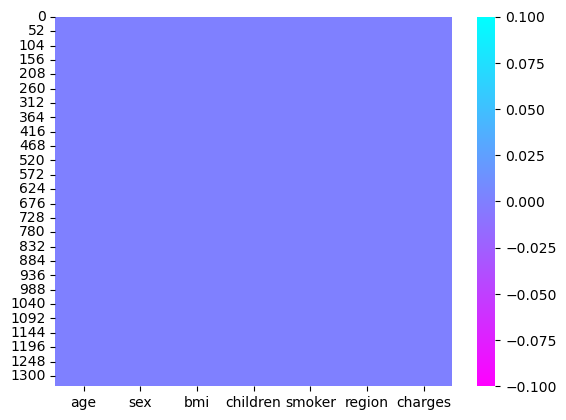

In [214]:
#Lets check the null values again

sns.heatmap(df.isnull(), cmap="cool_r")

In [282]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['region']
Numerical Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']


In [216]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [217]:
#checking number of unique values in each column

df.nunique().to_frame("No. of unique values")

No. of unique values
age                         47
sex                          2
bmi                        548
children                     6
smoker                       2
region                       4
charges                   1337

In [218]:
#checking the list of counts of target

df["charges"].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
df.describe()

In [234]:
df.head()

age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       0  southwest  16884.92400
1   18    1  33.770         1       1  southeast   1725.55230
2   28    1  33.000         3       1  southeast   4449.46200
3   33    1  22.705         0       1  northwest  21984.47061
4   32    1  28.880         0       1  northwest   3866.85520

In [ ]:
#convert 'sex' column to numeric
df['sex'] = pd.factorize(df['sex'])[0]

#view updated DataFrame
df

In [230]:
#convert 'smoker' column to numeric
df['smoker'] = pd.factorize(df['smoker'])[0]

#view updated DataFrame
df

age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       0  southwest  16884.92400
1      18    1  33.770         1       1  southeast   1725.55230
2      28    1  33.000         3       1  southeast   4449.46200
3      33    1  22.705         0       1  northwest  21984.47061
4      32    1  28.880         0       1  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       1  northwest  10600.54830
1334   18    0  31.920         0       1  northeast   2205.98080
1335   18    0  36.850         0       1  southeast   1629.83350
1336   21    0  25.800         0       1  southwest   2007.94500
1337   61    0  29.070         0       0  northwest  29141.36030

[1338 rows x 7 columns]

In [231]:
df['smoker']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    1
1335    1
1336    1
1337    0
Name: smoker, Length: 1338, dtype: int64

# Data Visualization 


Univariate Analysis

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


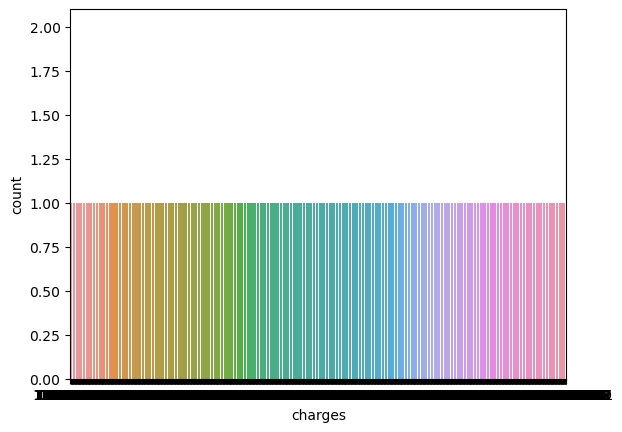

In [220]:
#visualize the number of charges column

ax=sns.countplot(x= 'charges',data=df)
print(df['charges'].value_counts())


18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


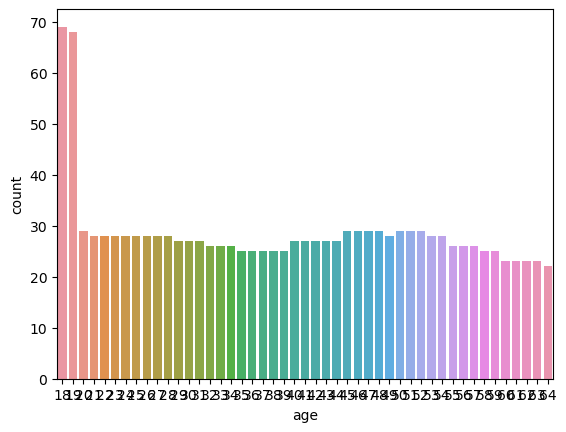

In [222]:
#visualize the number of age column

ax=sns.countplot(x= 'age',data=df)
print(df['age'].value_counts())

male      676
female    662
Name: sex, dtype: int64


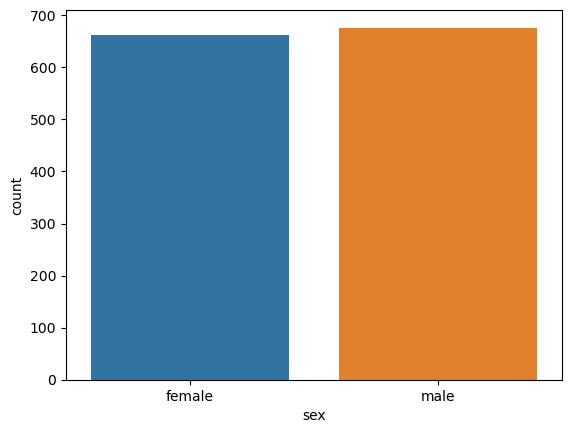

In [223]:
#visualize the number of sex column

ax=sns.countplot(x= 'sex',data=df)
print(df['sex'].value_counts())

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


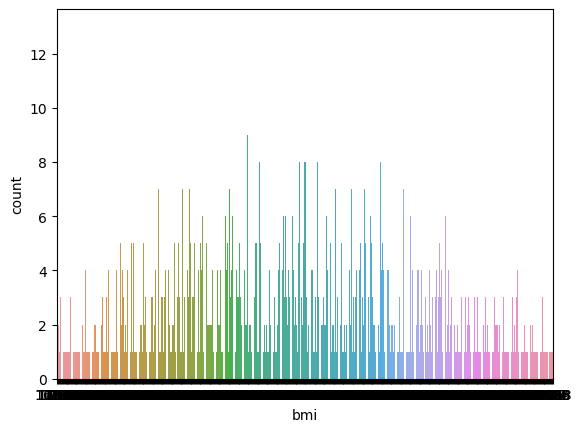

In [224]:
#visualize the number of bmi column

ax=sns.countplot(x= 'bmi',data=df)
print(df['bmi'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


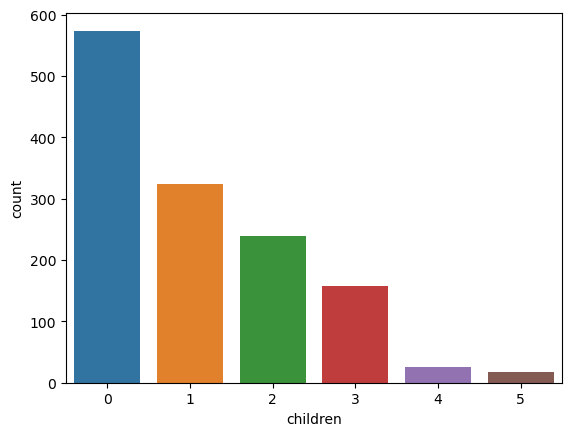

In [225]:
#visualize the number of children column

ax=sns.countplot(x= 'children',data=df)
print(df['children'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


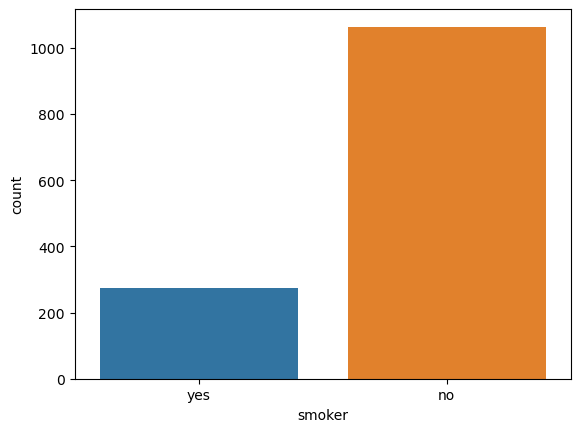

In [226]:
#visualize the number of smoker column

ax=sns.countplot(x= 'smoker',data=df)
print(df['smoker'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


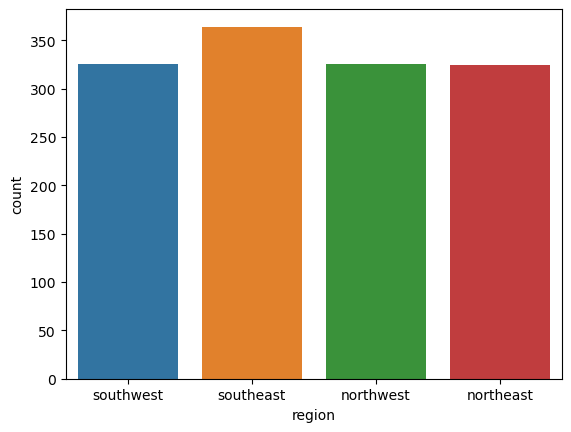

In [227]:
#visualize the number of region column

ax=sns.countplot(x= 'region',data=df)
print(df['region'].value_counts())

In [228]:
#convert 'sex' column to numeric
df['sex'] = pd.factorize(df['sex'])[0]

#view updated DataFrame
df

age  sex     bmi  children smoker     region      charges
0      19    0  27.900         0    yes  southwest  16884.92400
1      18    1  33.770         1     no  southeast   1725.55230
2      28    1  33.000         3     no  southeast   4449.46200
3      33    1  22.705         0     no  northwest  21984.47061
4      32    1  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    1  30.970         3     no  northwest  10600.54830
1334   18    0  31.920         0     no  northeast   2205.98080
1335   18    0  36.850         0     no  southeast   1629.83350
1336   21    0  25.800         0     no  southwest   2007.94500
1337   61    0  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

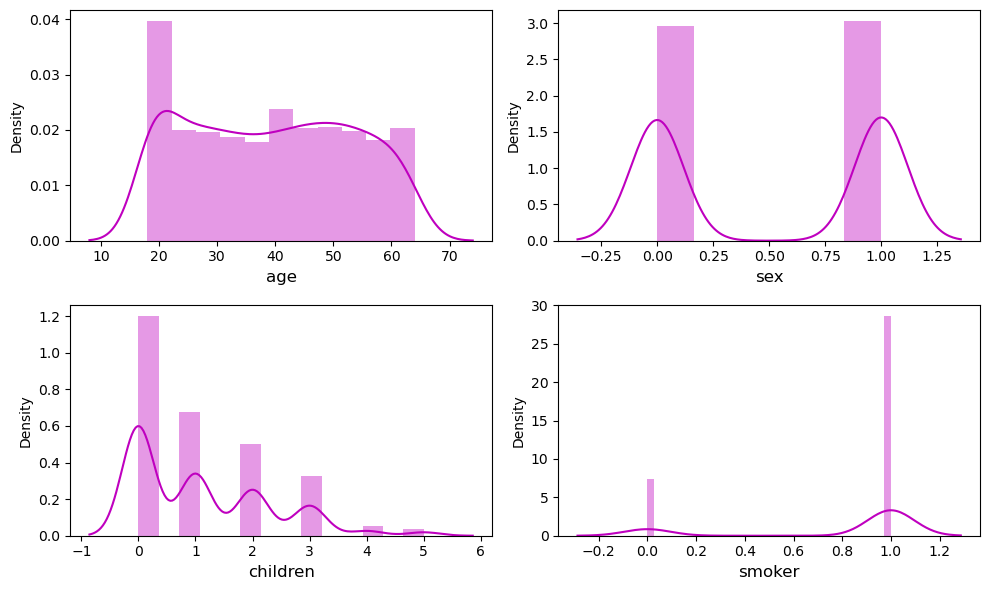

In [232]:
#Lets check how the data has been distributed in remaining column

plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber) #subplot is a method 
        sns.distplot(df[col],color ="m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()




# Bivariate Analysis

<AxesSubplot:title={'center':'Comparison between sex and age'}, xlabel='sex', ylabel='age'>

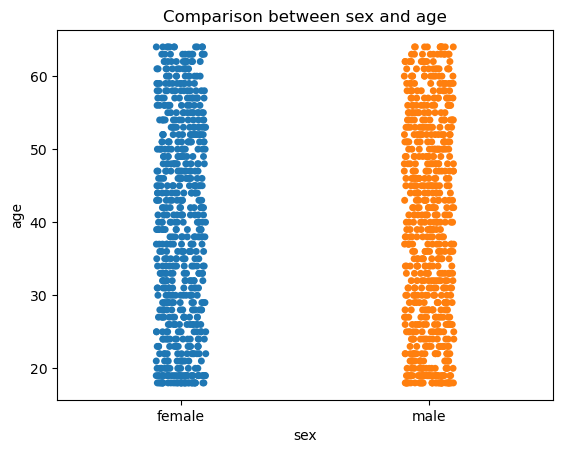

In [236]:
#when we Comparing two set of data plot: 
#Male - 1 and Female is 0
plt.title("Comparison between sex and age")
sns.stripplot(x="sex", y = "age",data = df)

<AxesSubplot:title={'center':'Comparison between sex and smoker'}, xlabel='age', ylabel='smoker'>

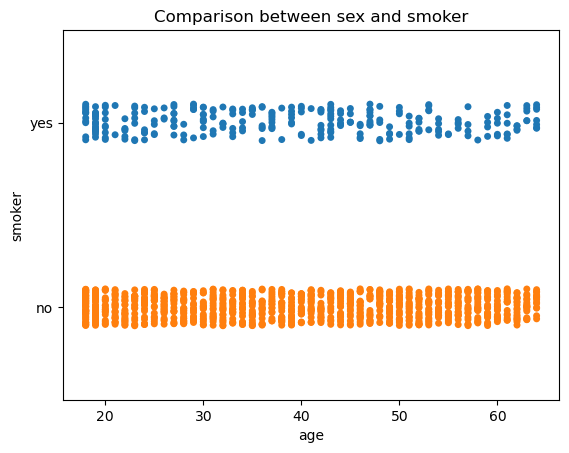

In [237]:
#when we Comparing two set of data plot: 

plt.title("Comparison between sex and smoker")
sns.stripplot(x="age", y = "smoker",data = df)

<AxesSubplot:title={'center':'Comparison between smoker and charges'}, xlabel='smoker', ylabel='charges'>

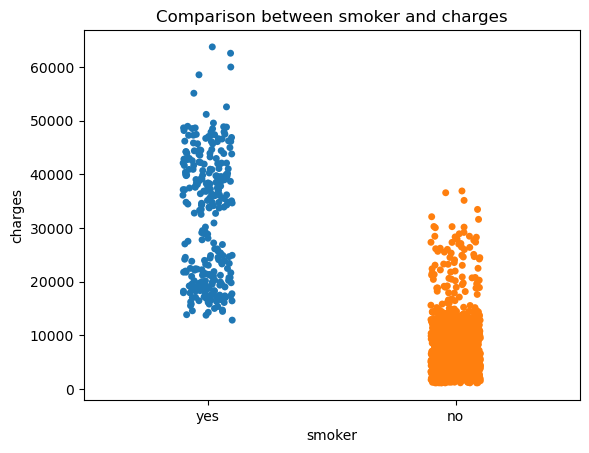

In [238]:
#when we Comparing two set of data plot: 

plt.title("Comparison between smoker and charges")
sns.stripplot(x="smoker", y = "charges",data = df)

People who smokes have higher charges than people who do no smoke

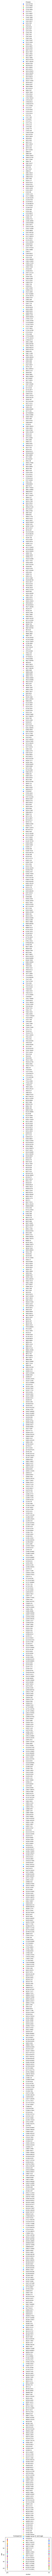

In [239]:
#comparing the smoker and age observing charges

plt.title("Comparision between smoker and age")
sns.scatterplot(x='smoker', y='age',data=df, hue= 'charges', palette = 'bright')
plt.show()

# Multvariant Analysis

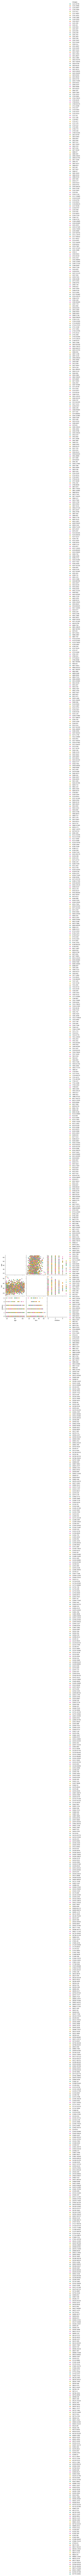

In [241]:
sns.pairplot(df, hue="charges", palette = "Dark2")
plt.show()

In [247]:
#convert 'sex' column to numeric
df['sex'] = pd.factorize(df['sex'])[0]

#view updated DataFrame
df

age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       0  southwest  16884.92400
1      18    1  33.770         1       1  southeast   1725.55230
2      28    1  33.000         3       1  southeast   4449.46200
3      33    1  22.705         0       1  northwest  21984.47061
4      32    1  28.880         0       1  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       1  northwest  10600.54830
1334   18    0  31.920         0       1  northeast   2205.98080
1335   18    0  36.850         0       1  southeast   1629.83350
1336   21    0  25.800         0       1  southwest   2007.94500
1337   61    0  29.070         0       0  northwest  29141.36030

[1338 rows x 7 columns]

In [245]:
#convert 'smoker' column to numeric
df['smoker'] = pd.factorize(df['smoker'])[0]

#view updated DataFrame
df

age     sex     bmi  children  smoker     region      charges
0      19  female  27.900         0       0  southwest  16884.92400
1      18    male  33.770         1       1  southeast   1725.55230
2      28    male  33.000         3       1  southeast   4449.46200
3      33    male  22.705         0       1  northwest  21984.47061
4      32    male  28.880         0       1  northwest   3866.85520
...   ...     ...     ...       ...     ...        ...          ...
1333   50    male  30.970         3       1  northwest  10600.54830
1334   18  female  31.920         0       1  northeast   2205.98080
1335   18  female  36.850         0       1  southeast   1629.83350
1336   21  female  25.800         0       1  southwest   2007.94500
1337   61  female  29.070         0       0  northwest  29141.36030

[1338 rows x 7 columns]

##  Checking for outliers


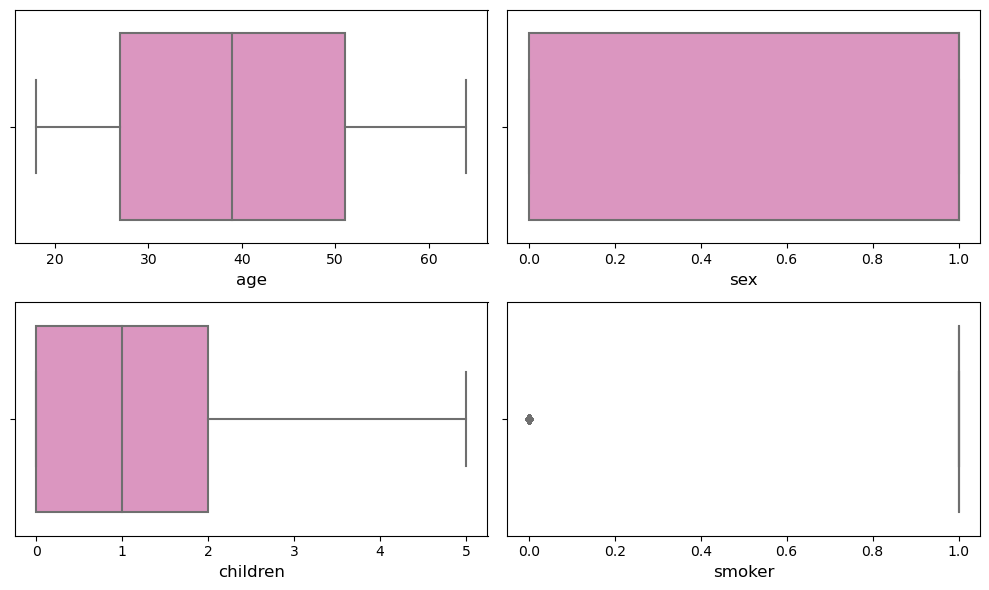

In [248]:
#lets check the outliers by plotting boxplot.

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()



In [283]:
df.shape

(1338, 7)

In [284]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [285]:
x

age  sex     bmi  children  smoker     region
0      19    0  27.900         0       0  southwest
1      18    1  33.770         1       1  southeast
2      28    1  33.000         3       1  southeast
3      33    1  22.705         0       1  northwest
4      32    1  28.880         0       1  northwest
...   ...  ...     ...       ...     ...        ...
1333   50    1  30.970         3       1  northwest
1334   18    0  31.920         0       1  northeast
1335   18    0  36.850         0       1  southeast
1336   21    0  25.800         0       1  southwest
1337   61    0  29.070         0       0  northwest

[1338 rows x 6 columns]

In [286]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(x))
z.shape

In [254]:
threshold = 3
print(np.where(z>3))

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
        932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
      dtype=int64), array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
      dtype=int64))


In [255]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)
#x.shape

(1338, 7)
(1316, 7)


In [256]:
y = y[(z<3).all(axis=1)]
y.shape

(1316,)

In [257]:
#percentage data loss:
loss_percent=(1338-1316)/1338*100
print(loss_percent)

1.6442451420029895


## Model without outlier is df and model with desired outlier is df_new1

In [ ]:
#Transforming data to remove skewness:

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [289]:
x

age  sex     bmi  children  smoker     region
0      19    0  27.900         0       0  southwest
1      18    1  33.770         1       1  southeast
2      28    1  33.000         3       1  southeast
3      33    1  22.705         0       1  northwest
4      32    1  28.880         0       1  northwest
...   ...  ...     ...       ...     ...        ...
1333   50    1  30.970         3       1  northwest
1334   18    0  31.920         0       1  northeast
1335   18    0  36.850         0       1  southeast
1336   21    0  25.800         0       1  southwest
1337   61    0  29.070         0       0  northwest

[1338 rows x 6 columns]

In [290]:
y.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [291]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker     -1.464766
charges     1.515880
dtype: float64

if skewness is (-0.5 to +0.5 ), here skewness of quality column is 0.2 so the weight in the left tail of the distribution.

Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

Symmetrical: A distribution can be called symmetric if it appears the same from the left and right from the center point.
Asymmetrical: A distribution can be called asymmetric if it doesn’t appear the same from the left and right from the center point.
Distribution on the basis of skewness value:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

In [292]:
#Removing skewness using cuberoot method

df['charges']=np.cbrt(df['charges'])

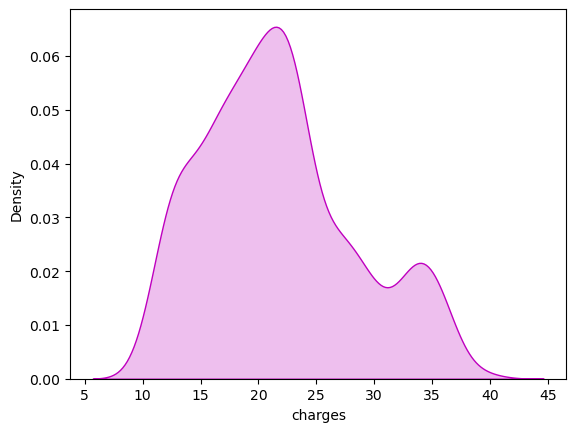

In [293]:
#Let visualize how the data distributed in alcohol after removing skewness

sns.distplot(df['charges'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

In [294]:
#Encoding categorical columns using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df    

age  sex     bmi  children  smoker  region    charges
0      19    0  27.900         0       0     3.0  25.654666
1      18    1  33.770         1       1     2.0  11.994331
2      28    1  33.000         3       1     2.0  16.447599
3      33    1  22.705         0       1     1.0  28.013799
4      32    1  28.880         0       1     1.0  15.695891
...   ...  ...     ...       ...     ...     ...        ...
1333   50    1  30.970         3       1     1.0  21.967271
1334   18    0  31.920         0       1     0.0  13.017690
1335   18    0  36.850         0       1     2.0  11.768318
1336   21    0  25.800         0       1     3.0  12.615872
1337   61    0  29.070         0       0     1.0  30.773007

[1338 rows x 7 columns]

In [295]:
df.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.795217   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     1.000000   
50%      39.000000     1.000000    30.400000     1.000000     1.000000   
75%      51.000000     1.000000    34.693750     2.000000     1.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region      charges  
count  1338.000000  1338.000000  
mean      1.515695    21.740315  
std       1.104885     6.609017  
min       0.000000    10.390777  
25%       1.000000    16.798411  
50%       2.000000    21.091088  
75%       2.000000    25.529963  
max       3.000000    39.952115

In [297]:
#checking the correlation between features and the target.

cor = df.corr()
cor

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469  0.025019  0.002127  0.451354
sex      -0.020856  1.000000  0.046371  0.017163 -0.076185  0.004588  0.027560
bmi       0.109272  0.046371  1.000000  0.012759 -0.003750  0.157566  0.156375
children  0.042469  0.017163  0.012759  1.000000 -0.007673  0.016569  0.123941
smoker    0.025019 -0.076185 -0.003750 -0.007673  1.000000  0.002181 -0.732564
region    0.002127  0.004588  0.157566  0.016569  0.002181  1.000000 -0.029807
charges   0.451354  0.027560  0.156375  0.123941 -0.732564 -0.029807  1.000000

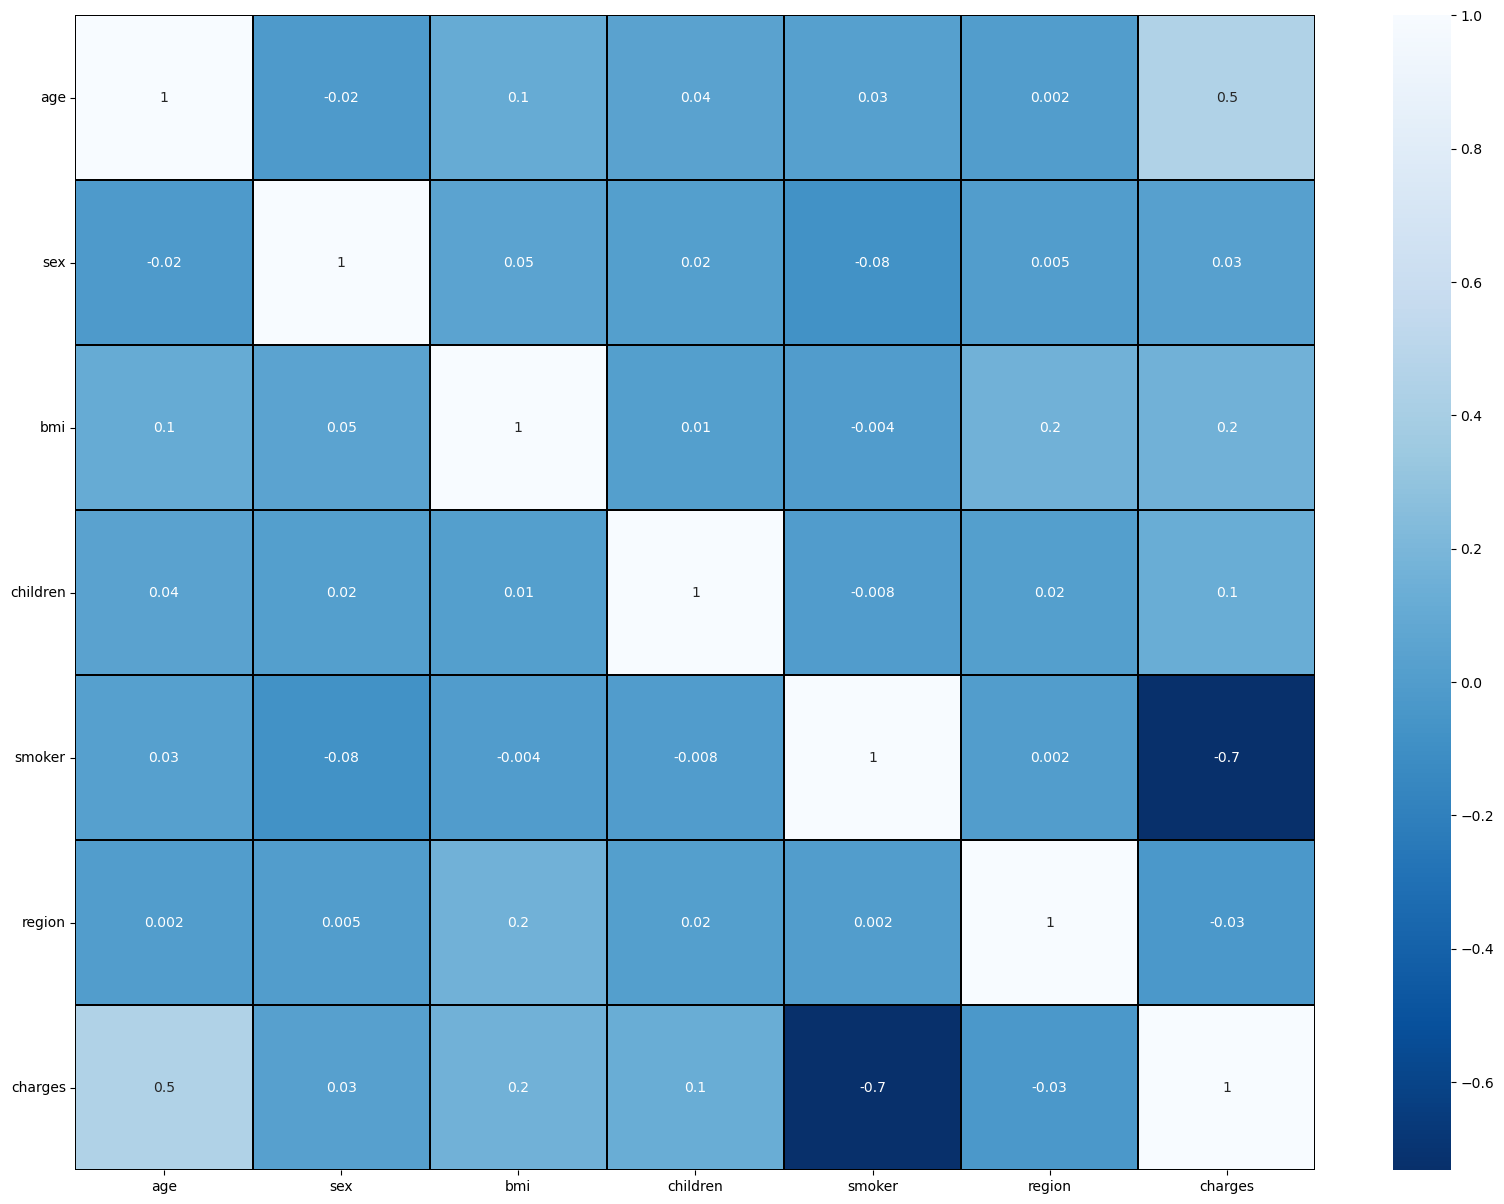

In [298]:
#visualizing the correlation matrix by plotting heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),linewidths = 0.1,fmt = ".1g",linecolor = "black",annot = True, cmap="Blues_r")
plt.yticks(rotation = 0);
plt.show()


In [ ]:
#less correlation -0.3 to +0.3, greater than -0.5 moderate correlation, greater than -0.7 or greater 0.7 is higher correlation


In [299]:
cor['charges'].sort_values(ascending = False)

charges     1.000000
age         0.451354
bmi         0.156375
children    0.123941
sex         0.027560
region     -0.029807
smoker     -0.732564
Name: charges, dtype: float64

# Visualizing the correlation between label and features using bar plot


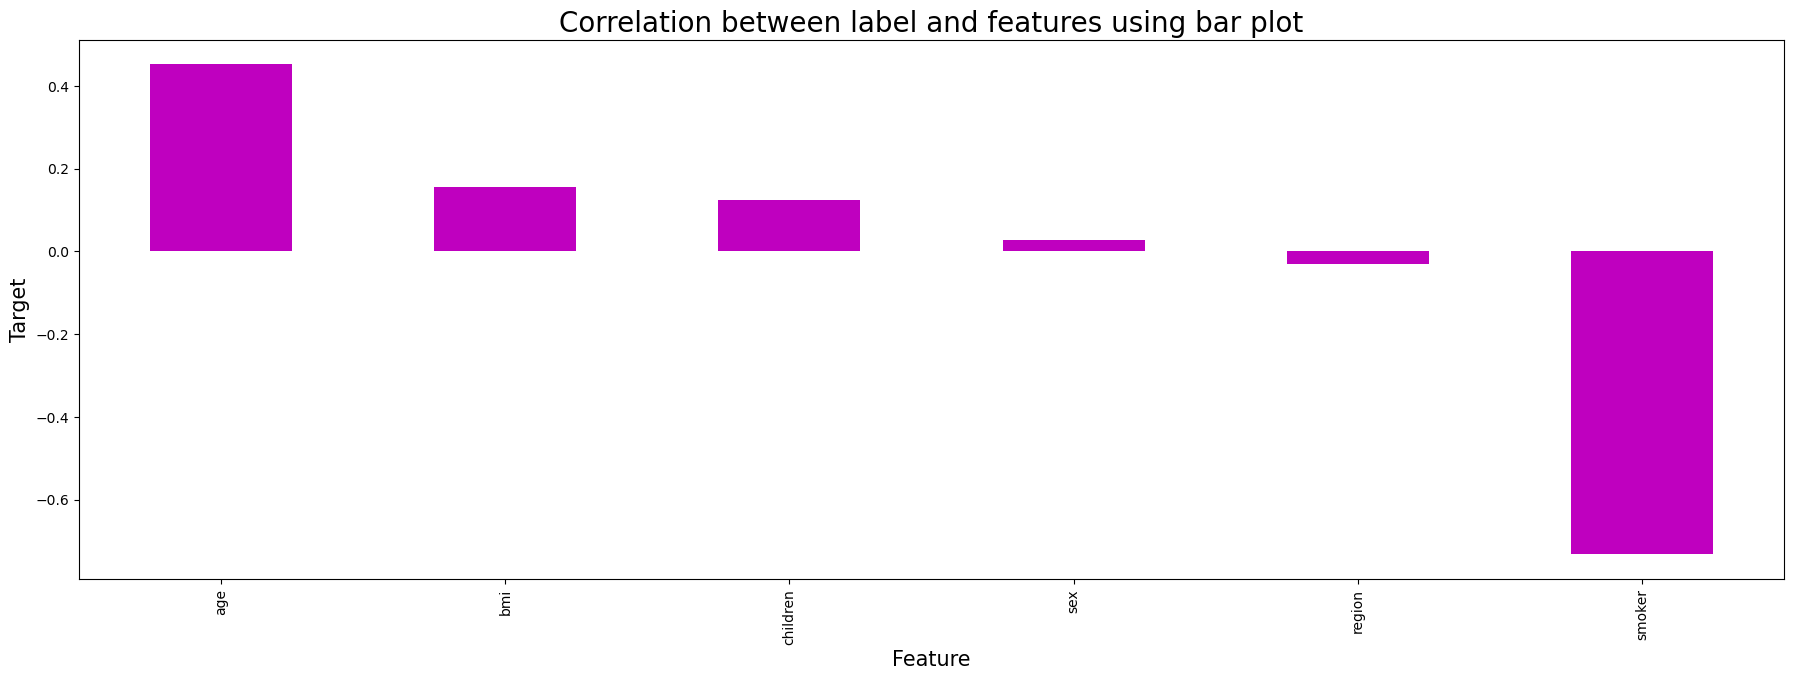

In [300]:
plt.figure(figsize = (22,7))
df.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title("Correlation between label and features using bar plot",fontsize=20)                                                        
plt.show()


# Separating features and label


In [301]:
x = df.drop("charges",axis = 1)
y = df["charges"]

In [302]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x


age       sex       bmi  children    smoker    region
0    -1.438764 -1.010519 -0.453320 -0.908614 -1.970587  1.343905
1    -1.509965  0.989591  0.509621 -0.078767  0.507463  0.438495
2    -0.797954  0.989591  0.383307  1.580926  0.507463  0.438495
3    -0.441948  0.989591 -1.305531 -0.908614  0.507463 -0.466915
4    -0.513149  0.989591 -0.292556 -0.908614  0.507463 -0.466915
...        ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.050297  1.580926  0.507463 -0.466915
1334 -1.509965 -1.010519  0.206139 -0.908614  0.507463 -1.372326
1335 -1.509965 -1.010519  1.014878 -0.908614  0.507463  0.438495
1336 -1.296362 -1.010519 -0.797813 -0.908614  0.507463  1.343905
1337  1.551686 -1.010519 -0.261388 -0.908614 -1.970587 -0.466915

[1338 rows x 6 columns]

### Checking Variance inflation Factor(VIF)

In [303]:
#Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

VIF values  Features
0    1.015394       age
1    1.008889       sex
2    1.040608       bmi
3    1.002482  children
4    1.006466    smoker
5    1.025966    region

Here we can see that the data is not balanced, since it is a classification problem we will balance the data using oversampling methods.

In [311]:
x.value_counts()

age        sex        bmi        children   smoker     region   
-1.509965  -1.010519   1.249462  -0.908614   0.507463   0.438495    2
-1.438764   0.989591  -0.012040  -0.908614   0.507463  -0.466915    2
-1.509965  -1.010519  -0.089961  -0.908614   0.507463  -1.372326    2
 0.554869   0.989591   0.888564  -0.078767  -1.970587   0.438495    1
 0.626070  -1.010519  -0.541904  -0.078767   0.507463  -1.372326    1
                                                                   ..
-0.584350  -1.010519  -0.663297  -0.908614   0.507463   0.438495    1
                      -0.797813   0.751079   0.507463   1.343905    1
                      -0.807656  -0.908614   0.507463   0.438495    1
                      -1.158711   0.751079   0.507463   1.343905    1
 1.765289   0.989591   1.610360  -0.908614   0.507463   0.438495    1
Length: 1335, dtype: int64

In [314]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

#view transformed values
print(y)



[1005   57  306 ...   32   91 1171]


In [316]:
y

array([1005,   57,  306, ...,   32,   91, 1171], dtype=int64)

In [337]:
import numpy as np
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x, y)


LogisticRegression()

In [338]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

y_transformed=y

[1005   57  306 ...   32   91 1171]


In [339]:
#fit logistic regression model
classifier = LogisticRegression()
classifier.fit(x, y)

LogisticRegression()

# Oversampling


In [ ]:
#oversampling the data

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

oversampling is not able show as it is showing continous data error although I used the LabelEncoder method

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu =0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc >maxAccu:
        maxAcc = acc
        maxRS = i
print("Best accuracy is ",maxAccu, "at random_state",maxRS)



Best accuracy is  0 at random_state 198


## Creating train test split


In [344]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = maxRS)


# Classification Algorithms

In [345]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score


# #RandomForest Classifier

In [346]:
#Checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.0024875621890547263
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          41       1.00      1.00      1.00    

# #Extra Tree Classifier

In [347]:
#Checking accuracy for Extra Tree tClassifier

ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.0024875621890547263
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          41       1.00      1.00      1.00         1
          47       0.00      0.00      0.00    

 ## Logistic Regression


In [348]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       0.0
          3

## Bagging Classifier

In [350]:
BC= BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.0024875621890547263
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          25       0.00      0.00      0.00    

## Support Vector Machine Classifier

In [351]:
#Checking accuracy for support vector machine classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.0024875621890547263
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          41       1.00      1.00      1.00         1
          47       0.00      0.00      0.00    

#  AdaBoost Classifier

In [352]:
#checking accuracy for Adaboost classifier

ABC =AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       0.0
          32       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       0.0
          41       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       0.0
          51       0.00      0.00      0.00       1.0
          5

# Cross Validation Score

In [353]:
from sklearn.model_selection import cross_val_score


cv=5--- it's a fold value  1, 2, 3, 4, 5
cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')


in classification algorithms- default scoring parameter- accuracy
for regression- deafulat scoring parameter is - r2 score


In [ ]:
#Checking cv score for Random Forest Classifier

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predRFC)-score.mean())



In [ ]:
#Checking cv score for Logistic Regression

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predLR)-score.mean())


In [ ]:
#Checking cv score for Support Vector Machine Classifier

score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predsvc)-score.mean())


In [ ]:
#Checking cv score for Bagging Classifier

score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predBC)-score.mean())


In [ ]:
#Checking cv score for Extra Trees Classifier

score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predET)-score.mean())


# Hyperparameter Tuning

In [ ]:
#ExtraTree Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini','entropy'],
              'random_state':[10,50,1000],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,200,300]}


In [ ]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv =5)


In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Final_model = SVC(parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]})

Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

# ROC/AUC Method

In [ ]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

#ROC reciever operator curve
#AUC Area under the curve
#binary classifier

In [ ]:
y_pred_prob = Final_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier(are=%0.2f)'%roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc Score:','\n',auc_score)

## saving the model


In [ ]:
import joblib
joblib.dump(Final_model,"Wine_project.pkl")

## Predicting the saved model


In [ ]:
#Lets load the saved model and get the prediction

model = joblib.load("Medical_cost_insurance.pkl")

#Prediction
prediction = model.predict(x_test)
prediction



In [ ]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

In [ ]:
#creating a dataframe
conclusion=pd.DataFrame([model.predict(x_test)[:]],index["Predicted","original"])   
